In [104]:
import sys
import os.path
import cv2
import numpy as np

In [105]:
#read a csv file and turn it into a a dictionary, where the first column is the key and the second column is the value:
def read_csv(filename):
    with open(filename) as f:
        lines = f.readlines()
    return {line.split(';')[0]:line.split(';')[1].strip() for line in lines}



In [106]:
index_R = read_csv('datos_R/descriptores.csv')
i=3
print(list(index_R.keys())[i])
print(list(index_R.values())[i])


dataset_tarea1/dataset_a/r/r0519.jpg
[0.0466733, 0.013390218, 0.012641108, 0.0, 0.09463398, 0.0, 0.0, 0.0, 0.0466733, 0.14224072, 0.019183015, 0.0426958, 0.0, 0.3941189, 0.0, 0.1270398, 0.13267177, 0.16609722, 0.28455192, 0.2055852, 0.22797576, 0.0, 0.3941189, 0.15000698, 0.16916987, 0.17576435, 0.3941189, 0.11142164, 0.028427402, 0.058863577, 0.0, 0.33566737, 0.05078159, 0.12071632, 0.099016026, 0.13831909, 0.089639, 0.03506027, 0.062888496, 0.054240678, 0.263032, 0.038499154, 0.11221811, 0.16473342, 0.13400453, 0.20375276, 0.13895173, 0.118036, 0.1481752, 0.287973, 0.11773399, 0.16467461, 0.25303707, 0.287973, 0.0698325, 0.030237412, 0.023058139, 0.0407542, 0.14304751, 0.070187494, 0.055906758, 0.08652817, 0.09558603, 0.287973, 0.17465018, 0.04262174, 0.12074269, 0.287973, 0.2788527, 0.14311741, 0.19489604, 0.287973, 0.14163017, 0.09603181, 0.06943325, 0.08062325, 0.26724097, 0.087673694, 0.056324065, 0.06924939, 0.21633594, 0.17279415, 0.08711783, 0.073471166, 0.1261638, 0.26724097,

In [107]:
list(index_R.values())[0].split(',')

['[0.04194113',
 ' 0.26943514',
 ' 0.26943514',
 ' 0.13844864',
 ' 0.044628397',
 ' 0.0027565015',
 ' 0.00037095425',
 ' 0.0004205637',
 ' 0.003673102',
 ' 0.21126783',
 ' 0.26943514',
 ' 0.24592099',
 ' 0.09043108',
 ' 0.06036281',
 ' 0.035792194',
 ' 0.04440727',
 ' 0.11712195',
 ' 0.1393714',
 ' 0.014297625',
 ' 0.21718569',
 ' 0.24225092',
 ' 0.26943514',
 ' 0.17127682',
 ' 0.15021719',
 ' 0.15321925',
 ' 0.08673398',
 ' 0.028830307',
 ' 0.15706375',
 ' 0.26943514',
 ' 0.22634514',
 ' 0.13218443',
 ' 0.11275054',
 ' 0.06168718',
 ' 0.18089555',
 ' 0.26752302',
 ' 0.23256993',
 ' 0.19512503',
 ' 0.20682275',
 ' 0.09623089',
 ' 0.052379724',
 ' 0.08046758',
 ' 0.06797436',
 ' 0.104587875',
 ' 0.22048423',
 ' 0.19235267',
 ' 0.23636715',
 ' 0.24497378',
 ' 0.20756008',
 ' 0.08688691',
 ' 0.11452508',
 ' 0.084859386',
 ' 0.12911755',
 ' 0.23709022',
 ' 0.24497378',
 ' 0.16475405',
 ' 0.24497378',
 ' 0.12400687',
 ' 0.024741694',
 ' 0.057320353',
 ' 0.042128336',
 ' 0.13617176',
 ' 0.24

In [108]:
# una funcion que recibe una imagen, calcula su descriptor HOG y lo compara con los descriptores de la base de datos index_R:

def buscar(imagen):

    # leer la imagen y calcular su descriptor HOG:
    img = cv2.imread(imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 128))
    hog = cv2.HOGDescriptor()
    descriptor = hog.compute(img)

    # comparar el descriptor de la imagen con los descriptores de la base de datos:
    distancias = []
    for key in index_R.keys():
        d = np.linalg.norm(descriptor - np.array(index_R[key][1:-1].split(','), dtype=np.float32))
        distancias.append(d)

    return distancias




dataset_tarea1/dataset_a/q/q0001.jpg


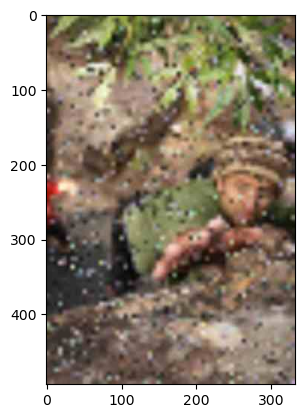

In [113]:
imagen_query = 'dataset_tarea1/dataset_a/q/q0001.jpg'
print(imagen_query)

#plotear la imagen query:
import matplotlib.pyplot as plt
img = cv2.imread(imagen_query)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

#obtener el nombre de las 5 imagenes mas parecidas:
distancias = buscar(imagen_query)






dataset_tarea1/dataset_a/r/r0440.jpg
dataset_tarea1/dataset_a/r/r2035.jpg
dataset_tarea1/dataset_a/r/r1959.jpg
dataset_tarea1/dataset_a/r/r0658.jpg
dataset_tarea1/dataset_a/r/r1637.jpg


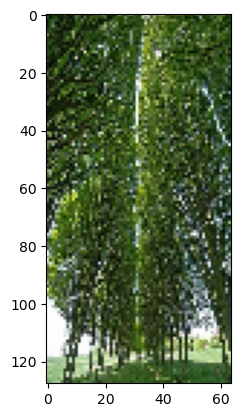

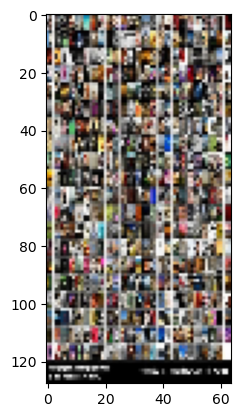

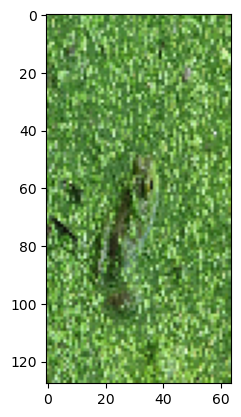

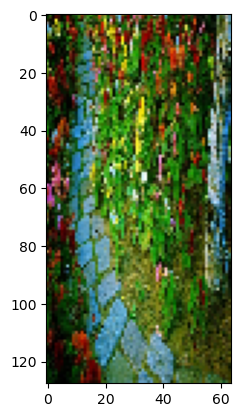

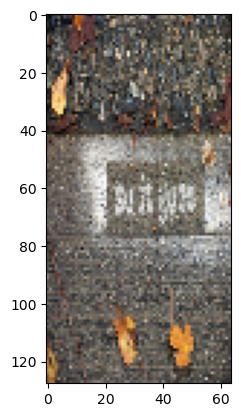

In [117]:
# obtener los nombres de las 5 imagenes mas parecidas:
distancias = buscar(imagen_query)
distancias = np.array(distancias)
indices = np.argsort(distancias)
for i in range(5):
    print(list(index_R.keys())[indices[i]])

#plotear las 5 imagenes mas parecidas:
for i in range(5):
    img = cv2.imread(list(index_R.keys())[indices[i]])
    img = cv2.resize(img, (64, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
